# Load some daters

In [1]:
import numpy as np
import pandas as pd
from ast import literal_eval
from pathlib import Path
from pprint import pprint
from sympy.combinatorics import Permutation
import matplotlib.pyplot as plt

# local data_dir
data_dir = Path("data")

puzzle_info = pd.read_csv(data_dir / 'puzzle_info.csv', index_col='puzzle_type')
# Parse allowed_moves
puzzle_info['allowed_moves'] = puzzle_info['allowed_moves'].apply(literal_eval)
# puzzle_info_df['total_allowed_moves'] = puzzle_info_df['allowed_moves_dict'].apply(lambda x: len(x.keys()))
puzzle_info['number_moves'] = puzzle_info['allowed_moves'].apply(lambda x: len(x.keys()))

puzzles_all = pd.read_csv(data_dir / 'puzzles.csv', index_col='id')
# Parse color states
puzzles_all = puzzles_all.assign(
    initial_state=lambda df: df['initial_state'].str.split(';'),
    solution_state=lambda df: df['solution_state'].str.split(';')
)

puzzles_all['total_components'] = puzzles_all['solution_state'].apply(len)
puzzles_all['all_unique_components'] = puzzles_all['solution_state'].apply(lambda x: np.unique(x))
puzzles_all['unique_components'] = puzzles_all['all_unique_components'].apply(len)

# load the sample_submission
ss = pd.read_csv(data_dir / 'sample_submission.csv', index_col='id')
ss['moves'] = ss['moves'].str.split('.')
ss['move_count'] = ss['moves'].apply(len)


                                                 moves  move_count
id                                                                
0                                            [r1, -f1]           2
1    [f1, d0, -r0, -f1, -d0, -f1, d0, -r0, f0, -f1,...          63
2    [f1, d0, -d1, r0, -d1, -f0, f1, -r0, -f0, -r1,...          62
3    [-f0, -r0, -f0, -d0, -f0, f1, r0, -d1, -r0, -r...          92
4    [d1, -f1, d1, r1, -f0, d1, -d0, -r1, d1, d1, -...          70
..                                                 ...         ...
393  [f19, f21, -f39, f20, f2, -f5, f7, -r3, f55, -...       30596
394  [-f31, -f22, f16, -f17, -f13, -f24, -f14, f2, ...       28971
395  [-r0, -f42, -f8, f16, -f49, f14, -f1, f56, f26...       28876
396  [f25, -f29, f46, f49, -f8, f27, f26, -f20, f2,...       26402
397  [-r1, f23, -f24, -r2, f30, f30, f38, -f19, f24...       21111

[398 rows x 2 columns]
282
puzzle_type                                                  cube_33/33/33
solution_state           [

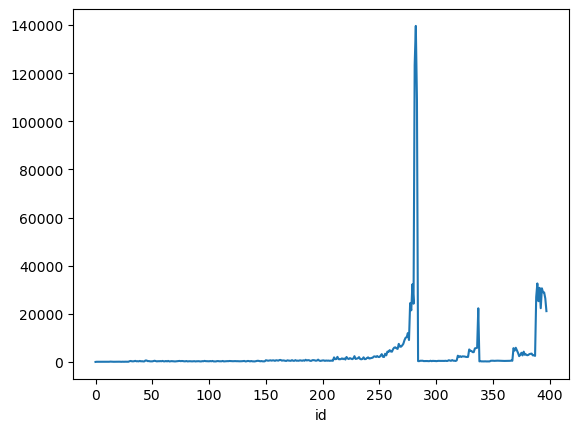

In [28]:


# create a line plot of ss showing id vs move_count
ss['move_count'].plot.line()
print(ss)

# what is the id of the maximum move_count?
max_move_count_id = ss['move_count'].idxmax()
print(max_move_count_id)
# print the puzzles_all for max_move_count_id
print(puzzles_all.loc[max_move_count_id])

In [14]:
# create a df from puzzles_all grouping by puzzle_type and total_components summarizing the number of puzzles
# with each unique number of unique components
# naming the summary column with the labele count
puzzles_summary = puzzles_all.groupby(['puzzle_type', 'total_components', 'unique_components']).size().reset_index(name='count')
puzzles_summary.head(50)

,puzzle_type,total_components,unique_components,count
0,cube_10/10/10,600,6,5
1,cube_19/19/19,2166,6,4
2,cube_2/2/2,24,6,25
3,cube_2/2/2,24,24,5
4,cube_3/3/3,54,6,110
5,cube_3/3/3,54,54,10
6,cube_33/33/33,6534,6,2
7,cube_33/33/33,6534,6534,1
8,cube_4/4/4,96,6,55
9,cube_4/4/4,96,96,5


In [68]:
def test_move_sequence(initial_state, move_sequence, move_dict_permutation):
    new_state = initial_state
    for i, move in enumerate(move_sequence):
        p = move_dict_permutation.get(move)
        if p is None:
            print("Requested move is not in puzzle's Move Dictionary")
            return
        new_state = p(new_state)
        print(f"{i}: {move}")
    return(new_state)

In [70]:
puzzle_number = 1
move_sequence = ss.moves.iloc[puzzle_number]
initial_state = puzzles_all.initial_state.iloc[puzzle_number]
solution_state = puzzles_all.solution_state.iloc[puzzle_number]
puzzle_type = puzzles_all.puzzle_type.iloc[puzzle_number]

# create move dictionary
move_dict = puzzle_info.loc[puzzle_type]['allowed_moves']
move_dict_permutation = {k: Permutation(v) for k, v in move_dict.items()}

# add inverse moves to move_dict_permutation
keys = list(move_dict_permutation.keys())
for k in keys:
    # add inverse moves to move_dict_permutation
    move_dict_permutation['-' + k] = move_dict_permutation[k] ** -1

In [72]:
print(f"Initial State: {initial_state}")
test_final = test_move_sequence(initial_state, move_sequence, move_dict_permutation)
print(f"Final State: {test_final}")
print(f"{'-'*45}")
print(f"Solution State: {solution_state}")
print(f"Final is equal to Solution: {test_final == solution_state}")



Initial State: ['D', 'E', 'C', 'B', 'B', 'E', 'F', 'A', 'F', 'D', 'B', 'F', 'F', 'E', 'B', 'D', 'A', 'A', 'C', 'D', 'C', 'E', 'A', 'C']
Initial State: ['D', 'E', 'C', 'B', 'B', 'E', 'F', 'A', 'F', 'D', 'B', 'F', 'F', 'E', 'B', 'D', 'A', 'A', 'C', 'D', 'C', 'E', 'A', 'C']
0: f1
1: d0
2: -r0
3: -f1
4: -d0
5: -f1
6: d0
7: -r0
8: f0
9: -f1
10: -r0
11: f1
12: -d1
13: -r1
14: f1
15: d1
16: r0
17: f1
18: d1
19: d0
20: -r0
21: -d0
22: -d0
23: f1
24: d1
25: d0
26: -r0
27: -d0
28: -r0
29: -d0
30: -d0
31: r0
32: -d0
33: -f1
34: d0
35: -r0
36: -r1
37: f1
38: -f0
39: f1
40: -d1
41: d0
42: -r0
43: -d0
44: -d0
45: f1
46: -d1
47: r0
48: -d0
49: -d1
50: -f1
51: -r1
52: f1
53: d1
54: -d0
55: -f1
56: -d0
57: -d1
58: r0
59: -d0
60: -d1
61: -f1
62: -f0
Final State: ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'F', 'F', 'F', 'F']
---------------------------------------------
Solution State: ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', '

In [2]:
import heapq
import time

# Define a function to evaluate the difference between two states to see if they match
def evaluate_difference(current_state, final_state):
    return (max(0, sum(s != g for s, g in zip(current_state, final_state))))

# Define a function to evaluate the score of a state
# this is used as the heuristic function for A* (h-value)
def evaluate_score(current_state, final_state):
    # Reward having the final position match, and also reward having 2 of the same state adjacent to each other
    # This has to be fast since it's called so often
    return (max(0, sum(s != g for s, g in zip(current_state, final_state))) + sum(s != g for s, g in zip(current_state[1:], current_state[:-1])) + 0.5*sum(s != g for s, g in zip(current_state[2:], current_state[:-2])))


def astar(move_dict, initial_state, final_state, wildcards, max_depth=50, timeout = 180):
    '''
    A* search algorithm. Returns the path of moves to solve the puzzle.
    Inputs:
        move_dict: Dictionary of moves
        initial_state: Initial state of the puzzle
        final_state: Final state of the puzzle
        wildcards: Number of wildcards allowed
        max_depth: Maximum depth to search
        timeout: Maximum time to search
    Outputs:
        path: List of moves to solve the puzzle
        node_counter: Number of nodes visited
        time_delta: Time elapsed
        '''
    
    # Priority queue to store nodes with their f-values (g + h)
    start_time = time.time()
    open_set = []
    node_counter = 1
    
    # Use a heap to store nodes with the lowest f-value at the top in open_set
    # heap is a list of tuples (f-value, state, path)
    heapq.heappush(open_set, (0, initial_state, [])) 
    
    # create closed set to store visited nodes
    closed_set = set()

    while open_set:
        # Check for timeout
        time_delta = time.time() - start_time
        if time_delta > timeout:
            print("Timed out.")
            return None, node_counter, time_delta
        
        # Get the node with the lowest f-value from the heap open_set
        current_f, current_state, current_path = heapq.heappop(open_set)
        
        # Check if we've reached the max depth (early termination)
        if len(current_path) > max_depth:
            print("Max depth exceeded.")
            return None, node_counter, time_delta

        # Check if we've reached the goal and return the path, node_counter, and time_delta
        if evaluate_difference(current_state, final_state) <= wildcards:
            # We've achieved our goal. Return the move path.
            return current_path, node_counter, time_delta

        # Add the current state to the closed set
        closed_set.add(tuple(current_state))
        
        # Add the next possible moves to the open set
        for move_str, move in move_dict.items():
            # apply the move permutation to the current state
            new_state = move(current_state)
            if tuple(new_state) not in closed_set:
                if len(current_path) < max_depth:
                    # Add the new state to the open set tuple (f-value, state, path)
                    # f-value = g + h
                        # g is the number of moves taken so far plus 1
                        # h is the heuristic score of the new state using evaluate_score
                    # state is the new state
                    # path is the current path plus the new move
                    heapq.heappush(open_set, 
                                   (len(current_path) + 1 + evaluate_score(new_state, final_state), 
                                    new_state, 
                                    current_path + [move_str]))
                    # Increment the node counter
                    node_counter += 1
    
    # end of the while loop
    # If no solutions are found:
    print("Open set completed. No solutions.")
    time_delta = time.time() - start_time
    return None, node_counter, time_delta

def plot_final_path(move_dict, initial_state, final_state, path):
    state_list = [initial_state]
    for move in path:
        p = move_dict.get(move)
        state_list.append(p(state_list[-1]))
    eval_list = [evaluate_score(state, final_state) for state in state_list]
    plt.plot(eval_list)
    plt.xlabel("Move Number")
    plt.ylabel("Heuristic Score")
    plt.show()

In [3]:
# test astar

puzzle_number = 30
move_sequence = ss.moves.iloc[puzzle_number]
initial_state = puzzles_all.initial_state.iloc[puzzle_number]
final_state = puzzles_all.solution_state.iloc[puzzle_number]
puzzle_type = puzzles_all.puzzle_type.iloc[puzzle_number]
wildcards = puzzles_all.num_wildcards.iloc[puzzle_number]

# create move dictionary
move_dict = puzzle_info.loc[puzzle_type]['allowed_moves']
move_dict_permutation = {k: Permutation(v) for k, v in move_dict.items()}

# add inverse moves to move_dict_permutation
keys = list(move_dict_permutation.keys())
for k in keys:
    # add inverse moves to move_dict_permutation
    move_dict_permutation['-' + k] = move_dict_permutation[k] ** -1

solution_path, node_counter, time_delta = astar(move_dict_permutation, initial_state, final_state, wildcards)
plot_final_path(move_dict_permutation, initial_state, final_state, solution_path)
print(f"Testing - Puzzle #{puzzle_number} solved in {len(solution_path)} moves. {node_counter} nodes. {wildcards} wildcards.")
print(f"Solution path: {solution_path}.")

Timed out.


TypeError: 'NoneType' object is not iterable

In [110]:
puzzles_all['solved'] = False
# puzzles_all['solution_path'] = [[] for _ in range(len(puzzles_all))]  # Initialize with empty lists
# puzzles_all['solution_path'] = puzzles_all['solution_path'].astype(object)
puzzles_all['node_count'] = None
puzzles_all['time_to_solve'] = None

for puzzle_number in puzzles_all.index:

    move_sequence = ss.moves.iloc[puzzle_number]
    initial_state = puzzles_all.initial_state.iloc[puzzle_number]
    final_state = puzzles_all.solution_state.iloc[puzzle_number]
    puzzle_type = puzzles_all.puzzle_type.iloc[puzzle_number]
    wildcards = puzzles_all.num_wildcards.iloc[puzzle_number]

    # create move dictionary
    move_dict = puzzle_info.loc[puzzle_type]['allowed_moves']
    move_dict_permutation = {k: Permutation(v) for k, v in move_dict.items()}

    # add inverse moves to move_dict_permutation
    keys = list(move_dict_permutation.keys())
    for k in keys:
        # add inverse moves to move_dict_permutation
        move_dict_permutation['-' + k] = move_dict_permutation[k] ** -1

    solution_path, node_counter, time_delta = astar(move_dict_permutation, initial_state, final_state, wildcards, timeout = 30)

    #plot_final_path(move_dict_permutation, initial_state, final_state, solution_path)
    if solution_path is None:
        print(f"Testing - Puzzle #{puzzle_number} did not find a solution. {node_counter} nodes.")
        puzzles_all.iloc[puzzle_number, 'solved'] = False
        #puzzles_all.loc[puzzle_number, 'solution_path'] = [None]
        puzzles_all.iloc[puzzle_number, 'node_count'] = node_counter
        puzzles_all.iloc[puzzle_number, 'time_to_solve'] = time_delta
        print(f"{'-'*45}")
    else:
        puzzles_all.iloc[puzzle_number, 'solved'] = True
        #puzzles_all.loc[puzzle_number, 'solution_path'] = [solution_path]
        puzzles_all.iloc[puzzle_number, 'node_count'] = node_counter
        puzzles_all.iloc[puzzle_number, 'time_to_solve'] = time_delta
        print(f"Testing - Puzzle #{puzzle_number} solved in {len(solution_path)} moves. {node_counter} nodes. {wildcards} wildcards.")
        print(f"Solution path: {solution_path}.")
        print(f"{'-'*45}")

Testing - Puzzle #0 solved in 2 moves. 24 nodes. 0 wildcards.
Solution path: ['r1', '-f1'].
---------------------------------------------
Testing - Puzzle #1 solved in 13 moves. 38359 nodes. 0 wildcards.
Solution path: ['f1', '-d0', '-r0', 'f1', 'r0', 'f0', 'd1', '-r0', '-d0', 'f0', 'f0', 'd0', '-f0'].
---------------------------------------------
Testing - Puzzle #2 solved in 14 moves. 92753 nodes. 0 wildcards.
Solution path: ['-f1', 'f0', '-r1', '-r1', '-f0', '-r0', '-d0', '-f0', 'd0', 'f0', 'f0', '-d0', '-f0', 'd0'].
---------------------------------------------
Testing - Puzzle #3 solved in 14 moves. 176509 nodes. 0 wildcards.
Solution path: ['-f0', '-d0', '-f1', 'r0', '-d1', 'r0', 'f1', '-r1', '-d1', 'r1', '-f0', 'r1', 'f0', '-d1'].
---------------------------------------------
Testing - Puzzle #4 solved in 14 moves. 106131 nodes. 0 wildcards.
Solution path: ['r0', '-f0', 'r1', '-f1', 'd0', 'r0', 'r0', '-f0', '-r0', 'f0', 'r0', '-f0', '-r0', 'f0'].
--------------------------------

In [112]:
# count the number of puzzles solved as a percentage of the total (2 decmil places)
puzzles_all['solved'].sum()/len(puzzles_all)
print(f"Percentage of puzzles solved: {puzzles_all['solved'].sum()/len(puzzles_all):.2%}")


Percentage of puzzles solved: 19.60%


In [119]:
# create a df from puzzles_all grouping by puzzle_type with columns for total puzzles, number solved, and percent solved
puzzles_summary = puzzles_all.groupby(['puzzle_type']).agg(
    total_puzzels=('puzzle_type', 'count'),
    total_solved=('solved', 'sum'),
    percent_solved=('solved', lambda x: round(x.sum()/len(x) * 10000, 2) / 100)
)
puzzles_summary.head(50)

,total_puzzels,total_solved,percent_solved
puzzle_type,,,
cube_10/10/10,5,0,0.0000
cube_19/19/19,4,0,0.0000
cube_2/2/2,30,28,93.3333
cube_3/3/3,120,3,2.5000
cube_33/33/33,3,0,0.0000
cube_4/4/4,60,0,0.0000
cube_5/5/5,35,0,0.0000
cube_6/6/6,12,0,0.0000
cube_7/7/7,5,0,0.0000


In [118]:
round(.12345678 * 10000, 2)/100


12.345699999999999

In [120]:
# examine results from puzzels_all with puzzle_type == cube_3/3/3
puzzles_all[puzzles_all['puzzle_type'] == 'cube_3/3/3'].head(50)

,puzzle_type,solution_state,initial_state,num_wildcards,total_components,all_unique_components,unique_components,solved,solution_path,node_count,time_to_solve
id,,,,,,,,,,,
30,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[A, A, E, C, F, F, C, C, C, D, B, D, D, B, A, ...",0,54,"[A, B, C, D, E, F]",6,False,[],2808050,30.00008
31,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[C, B, E, B, A, B, A, F, F, E, D, D, F, E, A, ...",6,54,"[A, B, C, D, E, F]",6,True,[],516453,5.557501
32,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[F, B, B, E, E, D, B, E, E, F, A, D, C, D, A, ...",0,54,"[A, B, C, D, E, F]",6,False,[],2695474,30.000028
33,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[C, A, F, D, F, A, B, F, D, F, B, A, C, B, B, ...",6,54,"[A, B, C, D, E, F]",6,True,[],353010,3.189666
34,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[B, C, F, F, D, D, C, A, B, A, B, A, E, A, F, ...",0,54,"[A, B, C, D, E, F]",6,False,[],2810105,30.000117
35,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[D, C, C, E, D, E, B, B, B, E, C, C, F, C, F, ...",0,54,"[A, B, C, D, E, F]",6,False,[],2825520,30.000123
36,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[B, C, D, A, D, A, A, E, A, B, B, B, F, A, E, ...",0,54,"[A, B, C, D, E, F]",6,False,[],2774701,30.000066
37,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[B, D, D, A, F, D, D, C, A, E, D, C, A, B, B, ...",0,54,"[A, B, C, D, E, F]",6,False,[],2848107,30.000099
38,cube_3/3/3,"[A, A, A, A, A, A, A, A, A, B, B, B, B, B, B, ...","[F, C, B, F, A, D, A, D, F, D, E, B, F, E, D, ...",6,54,"[A, B, C, D, E, F]",6,False,[],2724147,30.000145


In [2]:
for i in range(284, 330):
    print(f"puzzle type: {puzzles_all.iloc[i]['puzzle_type']}")
    print(f"solution length: {ss.iloc[i]['move_count']}")

puzzle type: wreath_6/6
solution length: 339
puzzle type: wreath_6/6
solution length: 335
puzzle type: wreath_6/6
solution length: 484
puzzle type: wreath_6/6
solution length: 482
puzzle type: wreath_6/6
solution length: 489
puzzle type: wreath_6/6
solution length: 351
puzzle type: wreath_6/6
solution length: 356
puzzle type: wreath_6/6
solution length: 380
puzzle type: wreath_6/6
solution length: 378
puzzle type: wreath_6/6
solution length: 322
puzzle type: wreath_6/6
solution length: 341
puzzle type: wreath_6/6
solution length: 486
puzzle type: wreath_6/6
solution length: 319
puzzle type: wreath_6/6
solution length: 452
puzzle type: wreath_6/6
solution length: 393
puzzle type: wreath_6/6
solution length: 398
puzzle type: wreath_6/6
solution length: 327
puzzle type: wreath_6/6
solution length: 397
puzzle type: wreath_6/6
solution length: 447
puzzle type: wreath_6/6
solution length: 412
puzzle type: wreath_7/7
solution length: 422
puzzle type: wreath_7/7
solution length: 441
puzzle typ